# Importing Libraries

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


# Importing the Dataset

In [3]:
#import the dataset

dataset = pd.read_csv('C:\\Users\\Chandu\\Desktop\\Datasets\\50_Startups.csv')

# Observing the Dataset

In [4]:
#observe the dataset

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


This dataset gives us the information about the details about startups and their profit.
By using the multiple linear regression, let's predict the profit based on the startup details.

# Preprocessing the Dataset

In [5]:
#Getting the basic information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


This dataset has 50 entries 

In [6]:
#Let's seperately check for only null values

dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

This tells us that none of the columns in the dataset has null values.

In [7]:
#Let's see the unique values of the 'State' column

dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
#Let's encode the state column values

Label = LabelEncoder()
dataset['State']= Label.fit_transform(dataset['State'])
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,0,166187.94


In [9]:
#Let's see the encoded values of the 'State' column

dataset['State'].unique()

array([2, 0, 1])

# Visualizing the Data

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'State'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

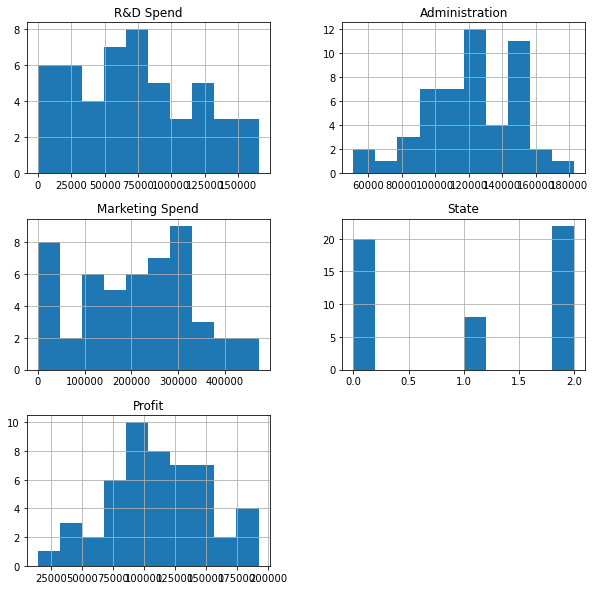

In [10]:
#Lets draw histogram graphs 


dataset.hist(figsize=(10,10),bins=10)

It shows that there are many startups in New York

# Dividing into input and output

Let's take all the values except the last column as our input values(independent variables) and the last column as our output(dependent variable).

In [11]:
#let's get the x values

x = dataset.iloc[:,:-1].values

In [12]:
#let's get the y values

y = dataset.iloc[:,-1].values
print (y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [13]:
#let's see the dataframe of the independent variables-x

print (pd.DataFrame(x).head())


           0          1          2    3
0  165349.20  136897.80  471784.10  2.0
1  162597.70  151377.59  443898.53  0.0
2  153441.51  101145.55  407934.54  1.0
3  144372.41  118671.85  383199.62  2.0
4  142107.34   91391.77  366168.42  0.0


# Dividing the dataset into Train and Test parts

In [14]:
#Let's split the dataset into testing and training part

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [15]:
#Let's see the size of x_train and y_train dataparts

x_train.size, y_train.size

(160, 40)

In [16]:
#Let's see the shape of x_train and y_train dataparts

x_train.shape, y_train.shape

((40, 4), (40,))

In [17]:
#Let's see the shape of x_test and y_test dataparts

x_test.shape, y_test.shape

((10, 4), (10,))

In [18]:
#Let's see the size of x_test and y_test dataparts

x_test.size, y_test.size

(40, 10)

# Running a Regressor

In [19]:
#Let's run a regressor to get the predicted values-profit
lr = LinearRegression()

# Fitting the model

In [20]:
#Let's fit the model by mapping the inputs with output of the training dataset.

lr = lr.fit(x_train, y_train)

# Predicting the output

In [21]:
#Let's predict the output values(y_test) based on the input values(x_test)

y_pred = lr.predict(x_test)
y_pred

array([128837.82992155, 100319.04697957, 109464.92565996, 157438.66490883,
        45013.90607832, 150814.37077908,  72139.30252438,  44082.96395951,
        96098.55790744, 151793.72812153])

In [22]:
#Let's see the actual output values(y_test)

y_test

array([134307.35, 101004.64, 105733.54, 149759.96,  42559.73, 132602.65,
        90708.19,  64926.08,  97483.56, 152211.77])

In [23]:
#Let's see the difference between the actual and the predicted output values

y_test - y_pred

array([  5469.52007845,    685.59302043,  -3731.38565996,  -7678.70490883,
        -2454.17607832, -18211.72077908,  18568.88747562,  20843.11604049,
         1385.00209256,    418.04187847])

# Evaluating the Accuracy score of the model

In [24]:
#Let's check the accuracy score of the model

r2_score (y_test,y_pred)


0.8945374685355292

# Estimating the model

Equation of the straight line: y = mx+c

y = m1x1+m2x2+m3x3+....m6 x6+c


In [25]:
#Let's see the intercept value

lr.intercept_


49287.757735186984

In [26]:
x_test.shape


(10, 4)

In [27]:
x_test

array([[9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 1.0713838e+05, 2.0000000e+00],
       [7.5328870e+04, 1.4413598e+05, 1.3405007e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00],
       [0.0000000e+00, 1.3542692e+05, 0.0000000e+00, 0.0000000e+00],
       [1.1994324e+05, 1.5654742e+05, 2.5651292e+05, 1.0000000e+00],
       [2.8663760e+04, 1.2705621e+05, 2.0112682e+05, 2.0000000e+00],
       [1.0002300e+03, 1.2415304e+05, 1.9039300e+03, 2.0000000e+00],
       [6.1136380e+04, 1.5270192e+05, 8.8218230e+04, 2.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00]])

In [28]:
#Let's see the coefficient value

lr.coef_

array([ 8.45703859e-01, -3.15583612e-02,  2.38567153e-02, -1.08902359e+03])

In [29]:
#Let's predict the output values based on the whole input values

y_pred= lr.predict(x)
print (y_pred)

[193881.11585341 192609.99231988 184504.80170052 174602.80998893
 175319.88485964 164145.20531573 161534.12047226 160437.28549375
 151793.72812153 157438.66490883 137452.90147019 136398.72263527
 130611.01920456 128837.82992155 150814.37077908 146338.30396879
 117732.75522596 129324.52026384 128134.94064516 116439.55421088
 117307.62927108 115701.89760369 115226.62155065 110333.73060621
 112486.62397212 102862.21845645 109464.92565996 112481.99610775
 101113.39293269 100319.04697957  98063.32430254  96098.55790744
  99934.35890738  95909.31429589  87513.81902783  88242.96284392
  72139.30252438  89639.94745214  66556.56104005  83452.96815951
  72897.60003714  74127.30565387  69776.21673298  57050.71819733
  63834.10330858  44082.96395951  52744.42904586  45013.90607832
  45935.195312    46673.62155359]


In [30]:
#Let's see the accuracy score of the whole dataset

r2_score(y, y_pred)

0.9487166707903278

# Improving the model

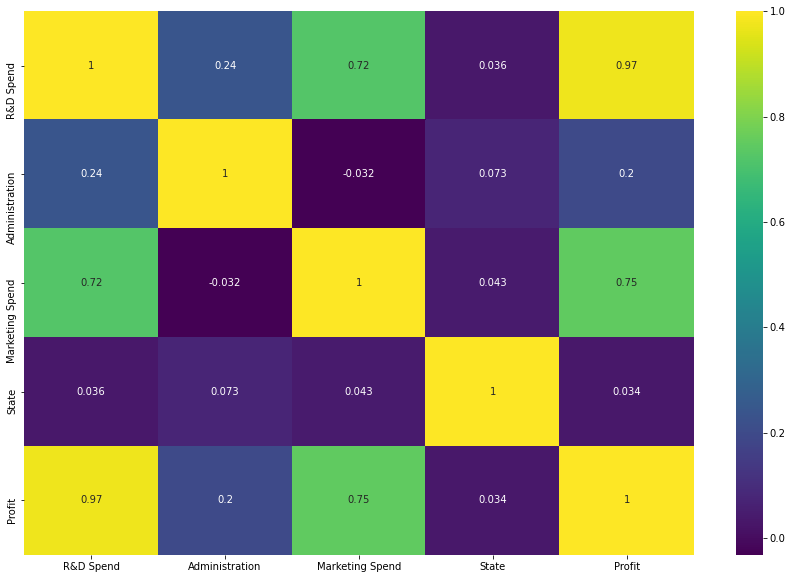

In [31]:
#checking the correlation
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot= True,cmap = 'viridis')
plt.show()


This correlation heatmap tells us that, the R&D values and Marketing Spend values are very much correlated with the profit value.
State and Administration values are less correlated with the profit value.

Let's use Ordinary Least Squares method to estimate the unkown parameters in a linerar regression model to approximate the solution by minimising the sum of the squares of the residuals.

In [32]:
import statsmodels.api as sm
lr_ols = sm.OLS (y, x).fit()

lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              913.6
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    3.54e-43
Time:                        20:46:20   Log-Likelihood:                         -545.56
No. Observations:                  50   AIC:                                      1099.
Df Residuals:                      46   BIC:                                      1107.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7207      0.065     11.006      0.000       0.589       0.853
x2             0.3170      0.035      9.024      0.000       0.246       0.388
x3             0.0803      0.022      3.602      0.001       0.035       0.125
x4          1454.6167   2122.838      0.685      0.497   -2818.434    5727.668
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.157
Skew:                          -0.184   Prob(JB):                        0.561
Kurtosis:                       2.352   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
pd.DataFrame(x).head()

,0,1,2,3
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,0.0


In [34]:
#Let's view the x dataframe

dataset.iloc[:, :-1].head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,0


Since the 'State' column values are least correlated with the profit let's take the remaining columnns to calculate the OLS

In [35]:
x_opt=x[:,[0,1,2]]

lr_ols = sm.OLS (y, x_opt).fit()

lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    1.17e-44
Time:                        20:46:20   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7180      0.065     11.047      0.000       0.587       0.849
x2             0.3277      0.031     10.458      0.000       0.265       0.391
x3             0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

lr= LinearRegression()
lr.fit(xopt_train,y_train)

opred= lr.predict (xopt_test)
opred

r2_score (y_test,opred)*100

90.00653083037321

In [37]:
opred= lr.predict (x_opt)
opred

r2_score (y,opred)*100

94.96916573955004

In [38]:
x_opt=x[:,[0,2]]

lr_ols = sm.OLS (y, x_opt).fit()

lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              550.4
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    8.02e-34
Time:                        20:46:20   Log-Likelihood:                         -575.87
No. Observations:                  50   AIC:                                      1156.
Df Residuals:                      48   BIC:                                      1160.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9781      0.108      9.026      0.000       0.760       1.196
x2             0.1375      0.039      3.563      0.001       0.060       0.215
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.715
Skew:                          -0.043   Prob(JB):                        0.700
Kurtosis:                       2.420   Cond. No.                         8.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

lr= LinearRegression()
lr.fit(xopt_train,y_train)

opred= lr.predict (xopt_test)
opred

r2_score (y_test,opred)*100

91.68381183550245

In [40]:
opred= lr.predict (x_opt)
opred

r2_score (y,opred)*100

94.9918789503252

In [41]:
x_opt=x[:,[2]]

lr_ols = sm.OLS (y, x_opt).fit()

lr_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              385.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    7.10e-25
Time:                        20:46:20   Log-Likelihood:                         -600.68
No. Observations:                  50   AIC:                                      1203.
Df Residuals:                      49   BIC:                                      1205.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4604      0.023     19.642      0.000       0.413       0.507
==============================================================================
Omnibus:                        3.421   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.609
Skew:                           0.284   Prob(JB):                        0.271
Kurtosis:                       3.964   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

lr= LinearRegression()
lr.fit(xopt_train,y_train)

opred= lr.predict (xopt_test)
opred

r2_score (y_test,opred)*100

-11.205578997827882

In [43]:
opred= lr.predict (x_opt)
opred

r2_score (y,opred)*100

53.97434389703943

### marketing has least std err

In [44]:
x_opt=x[:,[0]]

lr_ols = sm.OLS (y, x_opt).fit()

lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              878.4
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    6.00e-33
Time:                        20:46:20   Log-Likelihood:                         -581.74
No. Observations:                  50   AIC:                                      1165.
Df Residuals:                      49   BIC:                                      1167.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3363      0.045     29.637      0.000       1.246       1.427
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.246
Skew:                          -0.044   Prob(JB):                        0.536
Kurtosis:                       2.232   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now let's create the final model only with R&D spend as independent variable

In [45]:
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)

lr= LinearRegression()
lr.fit(xopt_train,y_train)

opred= lr.predict (xopt_test)
opred

r2_score (y_test,opred)*100

92.6510810934195

In [46]:
opred= lr.predict (x_opt)
opred

r2_score (y,opred)*100

94.64943582068932